Ad : Malik Enes

Soyad : Alpaslan

Numara : 2312721066

Gihub : https://github.com/MalikEnesAlpaslan/yapay_zeka_sistemleri_odev


In [9]:
import random
import matplotlib.pyplot as plt  # Grafik kütüphanesini ekledik

# x1, x2, y
ornekler = []

**Amaç (Fitness) Fonksiyonu:**
    Verilen x1 ve x2 genleri için bireyin başarısını (y skorunu) hesaplar.
    
    Mantık:
    - Kısıtlamalar: x1 [15-40], x2 [5-20] arasında olmalı ve çarpımları 600'ü geçmemeli.
    - Ceza: Kısıtlamalara uymazsa -100 puan (ceza) döndürür.
    - Ödül: Kısıtlamalara uyarsa matematiksel formüle göre puan hesaplar.

In [10]:
def amac_fonksiyonu(x1, x2):
    if x1 < 15 or x1 > 40 or x2 < 5 or x2 > 20 or x1 * x2 > 600:
      return -100

    else:
        return x1 * x2 - 0.1 * (x1 ** 2) - 0.1 * (x2 ** 2)

**Başlangıç Popülasyonu Oluşturma:**
    Algoritmanın başında tamamen rastgele bireyler üretir.
    
    Parametre:
    - olusturulacak_ornek_sayisi: Kaç adet rastgele birey üretileceği.
    
    İşlem:
    Rastgele x1 ve x2 seçer, y skorunu hesaplar ve global 'ornekler' listesine ekler.

In [11]:
def ornek_olustur(olusturulacak_ornek_sayisi):
    print("------------ ORNEKLER -----------")
    for _ in range(olusturulacak_ornek_sayisi):
        x1 = random.randint(15, 40)
        x2 = random.randint(5, 20)
        y = amac_fonksiyonu(x1, x2)

        print("x1:", x1, "x2:", x2, "y:", y)

        ornekler.append([x1, x2, y])


**Seçilim (Selection) Fonksiyonu:**
    Mevcut popülasyon içinden en iyi skora sahip ebeveynleri seçer.
    
    Parametre:
    - dizi: Değerlendirilecek popülasyon listesi.
    
    İşlem:
    1. Listeyi 'y' skoruna (index 2) göre büyükten küçüğe sıralar.
    2. En iyi 3 bireyi seçer.
    3. Bu bireyleri bir sonraki neslin ebeveynleri olarak döndürür.

In [12]:
def en_iyi_indeksleri_bul( dizi ):

    havuz = []

    sirali_ornekler = sorted(
        enumerate(dizi),
        key=lambda x: x[1][2],
        reverse=True
    )

    indeksler = []

    for i in range(min(3, len(sirali_ornekler))):
        indeks = sirali_ornekler[i][0]
        indeksler.append(indeks);

    for _ in range(3) :
      havuz.append( dizi[indeksler[_]] );

    return havuz


**Mutasyon Fonksiyonu:**
    Genetik çeşitliliği sağlamak ve yerel maksimumlara takılmamak için bireylerin
    genlerinde rastgele değişiklikler yapar.
    
    Parametreler:
    - dizi: Mutasyona uğrayacak bireyler listesi.
    - mutasyon_buyuklugu: Değişimin ne kadar şiddetli olacağı katsayısı.
    
    İşlem:
    - x1 veya x2'den birini rastgele seçip ufak bir sayı ile değiştirir.
    - Değişim sonrası değerlerin sınır dışına çıkıp çıkmadığını (Clamp) kontrol eder.
    """

In [13]:
def mutasyon(dizi, mutasyon_buyuklugu=5):
    for i in range(len(dizi)):

        sayi = random.uniform(-0.5, 0.5)
        degisecek = random.randint(0, 1)

        dizi[i][degisecek] += mutasyon_buyuklugu * sayi

        # Alt–üst sınırlar
        dizi[i][0] = max(15, min(40, dizi[i][0]))
        dizi[i][1] = max(5, min(20, dizi[i][1]))

        # Raf kısıtı
        if dizi[i][0] * dizi[i][1] > 600:
            oran = (600 / (dizi[i][0] * dizi[i][1])) ** 0.5
            dizi[i][0] *= oran
            dizi[i][1] *= oran

        # Amaç fonksiyonunu yeniden hesapla
        y = amac_fonksiyonu(dizi[i][0], dizi[i][1])

        if len(dizi[i]) == 2:
            dizi[i].append(y)
        else:
            dizi[i][2] = y


**Çaprazlama (Crossover) Fonksiyonu:**
    Seçilen ebeveynlerin genlerini karıştırarak yeni çocuklar üretir.
    
    Mantık:
    - 1. Çocuk: 1. Ebeveynin x1'i + 2. Ebeveynin x2'si
    - 2. Çocuk: 2. Ebeveynin x1'i + 3. Ebeveynin x2'si
    - ... şeklinde devam eder.
    
    Not: Çaprazlama işleminden hemen sonra oluşan çocuklar 'mutasyon' fonksiyonuna gönderilir.

In [14]:
def caprazlama( dizi ) :
  yeni_uyeler = []

  yeni_uyeler.append([dizi[0][0], dizi[1][1]]);
  yeni_uyeler.append([dizi[1][0], dizi[2][1]]);
  yeni_uyeler.append([dizi[2][0], dizi[0][1]]);

  mutasyon( yeni_uyeler);
  return yeni_uyeler



**Ana Program Döngüsü:**    Algoritmayı başlatır, nesilleri (iterasyonları) yönetir ve sonucu görselleştirir.
    
    Adımlar:
    1. İlk rastgele popülasyonu oluşturur.
    2. 50 iterasyon boyunca:
       - En iyileri seç (Selection)
       - Çaprazla ve Mutasyona [bağlantı metni](https://)uğrat (Crossover & Mutation)
       - Yeni çocukların skorlarını hesapla
       - Popülasyonu güncelle
       - En iyi skoru grafik için kaydet
    3. İşlem bitince gelişim grafiğini çizer.

In [15]:
def baslat():
    global ornekler

    y_gecmisi = []

    ornekler.clear()
    ornek_olustur(10)  # biraz daha büyük başlangıç

    print("\n" + "="*70)
    print(f"{'İterasyon':<10} {'En İyi x1':<15} {'En İyi x2':<15} {'En İyi y':<15}")
    print("="*70)

    for i in range(50):

        # En iyi ebeveynleri seç
        ebeveynler = en_iyi_indeksleri_bul(ornekler)

        # Çaprazlama + mutasyon
        cocuklar = caprazlama(ebeveynler)

        # Yeni popülasyon
        ornekler = ebeveynler + cocuklar

        # Gerçekten en iyi bireyi bul
        en_iyi_birey = max(ornekler, key=lambda x: x[2])

        y_gecmisi.append(en_iyi_birey[2])

        print(f"{i+1:<10} "
              f"{en_iyi_birey[0]:<15.4f} "
              f"{en_iyi_birey[1]:<15.4f} "
              f"{en_iyi_birey[2]:<15.4f}")

    # Grafik
    plt.plot(range(1, len(y_gecmisi)+1), y_gecmisi)
    plt.title("Genetik Algoritma Yakınsama Grafiği")
    plt.xlabel("İterasyon")
    plt.ylabel("En İyi Amaç Fonksiyonu Değeri")
    plt.grid(True)
    plt.show()


------------ ORNEKLER -----------
x1: 38 x2: 15 y: 403.1
x1: 34 x2: 6 y: 84.8
x1: 29 x2: 17 y: 380.0
x1: 29 x2: 16 y: 354.29999999999995
x1: 35 x2: 6 y: 83.9
x1: 30 x2: 5 y: 57.5
x1: 18 x2: 19 y: 273.5
x1: 25 x2: 20 y: 397.5
x1: 26 x2: 7 y: 109.49999999999999
x1: 35 x2: 8 y: 151.1

İterasyon  En İyi x1       En İyi x2       En İyi y       
1          35.4190         16.9401         445.8531       
2          33.7639         17.7705         454.4211       
3          33.0801         18.1378         457.6726       
4          33.0801         18.1378         457.6726       
5          31.8261         18.8524         463.1683       
6          31.7765         18.8819         463.3729       
7          31.5024         19.0461         464.4841       
8          30.8996         19.4177         466.8167       
9          30.8755         19.4329         466.9068       
10         30.4346         19.7144         468.5078       
11         30.4346         19.7144         468.5078       
12       

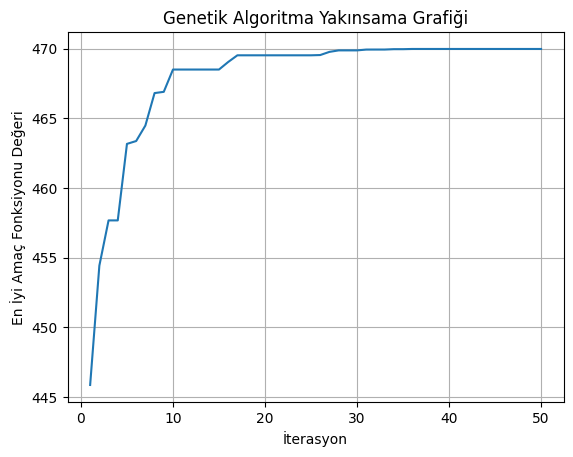

In [16]:
baslat()